In [1]:
import time
import IPython
import os
import json
from datetime import datetime
from pyswarm import pso
import joblib
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
from tensorflow import keras
import keras.backend as K
K.set_floatx('float32')
from keras.models import Sequential, Model
# from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Lambda, Layer
# from tensorflow.keras import losses
# from keras.utils.vis_utils import plot_model, model_to_dot

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error

tfb = tfp.bijectors
tfd = tfp.distributions
tfk = tfp.math.psd_kernels

tf.enable_v2_behavior()

from tester.tester import Tester





2022-01-16 22:13:31.727795: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-16 22:13:31.727864: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Make directory for saving logs
K.clear_session()

print(os.getcwd())
print(os.chdir('..'))
print(os.getcwd())

tester = Tester()
tester.load_limits(os.path.join('.', 'advanced-bayesian-opt', 'configuration', 'limits.txt'))

time_now = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
log_path=os.path.join('./',time_now)
os.mkdir(log_path)

# Define bounds for the input variables and the spec for the output value

# The input values should be: p_vdda_hpbg, p_vddpd, temperature

lb = [2.2, 1.08, -40.]   # lower bounds of the design variables, i.e. input params for the sut_model
ub = [2.8, 1.41, 175.]   # upper bounds of the design variables, i.e. input params for the sut_model
n_dims=3


# Specification interval for pms_V_hpbg

out_spec=[1.099, 1.165]



/home/advanced/ip_hpbg_c40fla/nodm/default/units/ws_larrauri/simulation/fcv_c40fla_bgp/advanced-bayesian-opt
None
/home/advanced/ip_hpbg_c40fla/nodm/default/units/ws_larrauri/simulation/fcv_c40fla_bgp


In [3]:



# Returns the model output on single or multiple inputs (as in Cristi's code )

def _evaluate_model_once(model_input):
	print(model_input)
	assert len(model_input.shape) == 1
	filepath = os.path.join('.', 'advanced-bayesian-opt', 'input_configuration.csv')
	with open(filepath, 'w') as file:
		file.write('TRIMBG,string,enum,0 \n')
		file.write('TRIMCUR,string,enum,0 \n')
		file.write('models,string,enum,nom \n')
		file.write('vref,string,enum,0.6 \n')
		file.write('vss,string,enum,0v00 \n')
		file.write("vdda_evr,string,enum,{} \n".format(model_input[0]))
		file.write("vdda_hpbg,string,enum,{} \n".format(model_input[0]))
		file.write("vddpd,string,enum,{} \n".format(model_input[1]))
		file.write("T,string,enum,{} \n".format(model_input[2]))

	tester.load_limits(os.path.join('.', 'advanced-bayesian-opt', 'configuration', 'limits.txt'))
	#print('\nLoaded limits:\n{}'.format(tester.limits))

	tester.load_in_values(os.path.join('.', 'advanced-bayesian-opt', 'input_configuration.csv'))
	#print('\nLoaded in-values:\n{}'.format(tester.in_values))
	#print(tester.runs)

	# NOTE: comment out the next two lines if load_in_values() has been invoked with 'create_simlist=False' above
	tester.run_simulation()
	# print('\nSimulation launched!')

	tester.load_out_results()
	
	print('\nLoaded out-results:\n{}'.format(tester.out_results))

	output=tester.out_results['RUN1']['pms_V_hpbg']

	# print('\n Relevant output: \n {}, {}'.format(output,output+1))

	return output



def evaluate_model(model_input):
	print(model_input)
	model_input = np.array(model_input)
	if len(model_input.shape) == 1:
		one_datapoint = True
# 		model_input = [model_input]
	elif len(model_input.shape) == 2:
		one_datapoint = False
	else:
		assert False, "illegal model input: {}".format(model_input)

	if one_datapoint:
		return _evaluate_model_once(model_input)
	else:
		return [_evaluate_model_once(i) for i in model_input]





# def evaluate_model(model_input):
#     model_input = np.array(model_input)
#     if len(model_input.shape) == 1:
#         one_datapoint = True
#         model_input = [model_input]
#     elif len(model_input.shape) == 2:
#         one_datapoint = False
#     else:
#         assert False, "illegal model input: {}".format(model_input)
    
#     if sut_scaler_X is not None:
#         model_input = sut_scaler_X.transform(model_input)
#     model_output = (sut_model.predict(model_input)).ravel()
#     if sut_scaler_y is not None:
#         model_output = sut_scaler_y.inverse_transform(model_output.reshape(-1,1)).ravel()
    
#     if one_datapoint:
#         # we want the model_output to be a scalar and not a list containing a single scalar
#         model_output = model_output[0]
    
#     return model_output


In [5]:
y=evaluate_model(np.array([2.3, 1.20, 42.]))
print(y)

[ 2.3  1.2 42. ]
[ 2.3  1.2 42. ]
Simulator launched successfully!

Check "./simulation.log" for logs of the fcv execution


KeyboardInterrupt: 

In [13]:
os.system("pwd")
os.system("source ./setup_fcv")

/home/advanced/ip_hpbg_c40fla/nodm/default/units/ws_larrauri/simulation/fcv_c40fla_bgp
Hello


./setup_fcv: line 2: module: command not found
./setup_fcv: line 3: module: command not found
./setup_fcv: line 4: alias: cdfcv: not found
./setup_fcv: line 4: alias: cd /home/advanced/ip_hpbg_c40fla/nodm/default/units/ws_larrauri/simulation/fcv_c40fla_bgp: not found
./setup_fcv: line 11: module: command not found
./setup_fcv: line 12: module: command not found
./setup_fcv: line 13: module: command not found
./setup_fcv: line 14: module: command not found
./setup_fcv: line 15: module: command not found
./setup_fcv: line 16: module: command not found
./setup_fcv: line 17: module: command not found
./setup_fcv: line 26: module: command not found
./setup_fcv: line 27: module: command not found
./setup_fcv: line 29: module: command not found
./setup_fcv: line 32: module: command not found
./setup_fcv: line 34: module: command not found
./setup_fcv: line 35: unalias: wv: not found
./ifxfcvsetup.ini: line 2: alias: cdfcv: not found
./ifxfcvsetup.ini: line 2: alias: cd /home/advanced/ip_hpbg_

256

In [4]:
# Set run parameters

num_samples=50
observations=[]
training_proportion=0.4
optimization_proportion=1. - training_proportion

log_std_coefficient=4.
constant_std_coefficient=20.

run_stats={
    'num_samples':num_samples,
    'training_proportion':training_proportion,
    'log_std_coefficient':log_std_coefficient,
    'constant_std_coefficient':constant_std_coefficient
}

path=os.path.join(log_path,'run_stats.txt')
with open(path,'w') as file:
    json.dump(run_stats,file)



In [51]:
y=evaluate_model(np.array([2.1, 1.20, 42.]))
print(y)

[ 2.1  1.2 42. ]
[ 2.1  1.2 42. ]
Simulator launched successfully!

Check "./simulation.log" for logs of the fcv execution
Simulation took longer than timeout 


Loaded out-results:
{}


KeyError: 'RUN1'

In [45]:
exec(open('/opt/Modules/init/python.py').read())
module("load","fcv/1.7.4")
module("load", "titan/9.3.1")

In [48]:
!fcv -titan

Full chip verification environment (v1.7.4, build 562)
(using Titan/2.70 package)

syntax:
	fcv <pattern>[/<run|set>]
 or 	fcv <pattern>/<set>/<run>
 or 	fcv <command>

commands:
	CHECK                    Check all runs and source files for possible issues
	EXPORT                   Export report to /opt/basar/fcv
	JOBS                     Display active jobs
	LIC                      Display license usage
	PATTERN                  List all patterns that are currently in use
	PENDING                  View pending jobs that are in queue
	SUMMARY                  Update simulation results report

switches:
	[-archive]               Archive the results of a run
	[-delay=X|-d=X]          Delay start of run by X minutes
	[-enqueue|-e]            Start run(s) via scheduler and not immediately
	[-exclude=REGEXP]        Exclude run(s) whose name matches regular expression REGEXP
	[-force]                 Perform certain actions even if not recommended by FCV
	[-interactive|-i]        Show summa

In [37]:

print(os.getcwd())
os.system("pwd")
os.system("source ./setup_fcv")
# os.system("nohup fcv -titan 'hpbg_startup_trimall/.*'")

/home/advanced/ip_hpbg_c40fla/nodm/default/units/ws_larrauri/simulation/fcv_c40fla_bgp
/home/advanced/ip_hpbg_c40fla/nodm/default/units/ws_larrauri/simulation/fcv_c40fla_bgp
Hello


./setup_fcv: line 2: module: command not found
./setup_fcv: line 3: module: command not found
./setup_fcv: line 4: alias: cdfcv: not found
./setup_fcv: line 4: alias: cd /home/advanced/ip_hpbg_c40fla/nodm/default/units/ws_larrauri/simulation/fcv_c40fla_bgp: not found
./setup_fcv: line 11: module: command not found
./setup_fcv: line 12: module: command not found
./setup_fcv: line 13: module: command not found
./setup_fcv: line 14: module: command not found
./setup_fcv: line 15: module: command not found
./setup_fcv: line 16: module: command not found
./setup_fcv: line 17: module: command not found
./setup_fcv: line 26: module: command not found
./setup_fcv: line 27: module: command not found
./setup_fcv: line 29: module: command not found
./setup_fcv: line 32: module: command not found
./setup_fcv: line 34: module: command not found
./setup_fcv: line 35: unalias: wv: not found
./ifxfcvsetup.ini: line 2: alias: cdfcv: not found
./ifxfcvsetup.ini: line 2: alias: cd /home/advanced/ip_hpbg_

256

In [5]:
num_training_samples=np.int32(num_samples*training_proportion)
# num_optimization_rounds=np.int32(optimization_proportion*num_samples)

In [6]:
# Generate training points 
training_Xs=np.random.uniform(lb, ub, (num_training_samples,3))
training_Xs=training_Xs.astype(np.float32)
training_ys=evaluate_model(training_Xs)
training_ys=training_ys.astype(np.float32)

#Normalize the data
transform_X= StandardScaler()
norm_training_Xs= transform_X.fit_transform(training_Xs)
transform_y= StandardScaler()
norm_training_ys= transform_y.fit_transform(training_ys[...,np.newaxis]).ravel()


# Define trainable variables
# We will use the squared exponential kernel with different relevances for each direction. We also consider some variance due to noise. 

constrain_positive = tfb.Shift(np.finfo(np.float32).tiny)(tfb.Exp())
amplitude = tfp.util.TransformedVariable(
    initial_value=1.,
    bijector=constrain_positive,
    name='amplitude',
    dtype=np.float32)

relevances = tfp.util.TransformedVariable(
    initial_value=np.ones(n_dims),
    bijector=constrain_positive,
    name='relevances',
    dtype=np.float32)

# noise_var = tfp.util.TransformedVariable(
#     initial_value=0.01,
#     bijector=constrain_positive,
#     name='noise_variance',
#     dtype=np.float32)
noise_var = tf.constant(0.) 

# trainable_variables=[v.trainable_variables[0] for v in [amplitude, relevances, noise_var]]

trainable_variables=[v.trainable_variables[0] for v in [amplitude, relevances]]

# We define a Gaussian proccess with the chosen kernel that depends on our trainable variables

kernel=tfk.ExponentiatedQuadratic(amplitude,length_scale=1.0)
kernel=tfk.FeatureScaled(kernel, scale_diag=relevances)
gp=tfd.GaussianProcess(
        kernel=kernel,
        index_points=norm_training_Xs,
        observation_noise_variance=noise_var,
        jitter=1e-5)


# Define a tf.function for faster repeated evaluation 
@tf.function(autograph=False, experimental_compile=False)
def log_likelihood():
    return gp.log_prob(norm_training_ys)

# Now we optimize the model parameters.
num_iters = 2000
optimizer = tf.optimizers.Adam(learning_rate=.01)

# Store the likelihood values during training, so we can plot the progress
lls_ = np.zeros(num_iters, np.float32)
for i in range(num_iters):
    with tf.GradientTape() as tape:
        loss = -log_likelihood()
        grads = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(grads, trainable_variables))
        lls_[i] = loss.numpy()



# Plot the loss evolution as a sanity check
plt.figure(figsize=(12, 4))
plt.plot(lls_)
plt.xlabel("Training iteration")
plt.ylabel("Log marginal likelihood")
plt.show()

    
# Log all the relevant information

filepath=os.path.join(log_path,'training.npyz')
to_save={
    'points':training_Xs,
    'values':training_ys,
    'norm_points':norm_training_Xs,
    'norm_values':norm_training_ys,
    'loss':lls_,
    'amplitude':amplitude.numpy(),
    'relevances':relevances.numpy(),
    'noise':noise_var.numpy(),
}
with open(filepath,'wb') as file: 
    np.savez(file, **to_save)


filepath=os.path.join(log_path,'scaler_X.pkl')
with open(filepath,'wb') as file:
    joblib.dump(transform_X,file)


filepath=os.path.join(log_path,'scaler_y.pkl')  
with open(filepath,'wb') as file:
    joblib.dump(transform_y,file)



[[  2.6137497   1.4071687 -25.7629   ]
 [  2.419876    1.2880507  58.061584 ]
 [  2.525138    1.2357097 141.99878  ]
 [  2.248794    1.3723686 147.40392  ]
 [  2.2047296   1.1144536 -20.61339  ]
 [  2.4396596   1.291854  127.023766 ]
 [  2.725794    1.2930049  -4.3790236]
 [  2.5396724   1.2024204   7.609767 ]
 [  2.7406926   1.1138864 108.60978  ]
 [  2.381344    1.170571  -18.158066 ]
 [  2.7126956   1.1339333  -3.1079893]
 [  2.631066    1.1444539  75.83801  ]
 [  2.5056355   1.2509494 103.07014  ]
 [  2.3535879   1.2775686 -38.675007 ]
 [  2.4692965   1.2127479 -30.094402 ]
 [  2.3808885   1.102832   27.209188 ]
 [  2.5240314   1.3537577  93.05709  ]
 [  2.3493598   1.123891   27.119555 ]
 [  2.3970685   1.2017182  75.25384  ]
 [  2.6828477   1.3266284 -31.987648 ]]
[  2.6137497   1.4071687 -25.7629   ]
Simulator launched successfully!

Check "./simulation.log" for logs of the fcv execution
Simulation took longer than timeout 


Loaded out-results:
{}


KeyError: 'RUN1'

In [8]:
# Define the new limits and spec according to the transforms applied to train the model

norm_ub=transform_X.transform([ub])[0].astype(np.float32)
norm_lb=transform_X.transform([lb])[0].astype(np.float32)
norm_out_spec=transform_y.transform(np.expand_dims(out_spec,-1)).ravel()


# Helper function to call the sut using normalized coordinates

def norm_evaluate_model(norm_x):
    x=transform_X.inverse_transform(norm_x).astype(np.float32)
    y=evaluate_model(x)
    norm_y=transform_y.transform(y.reshape(1,-1)).astype(np.float32).ravel()[0]
    return norm_y


# Setting up the optimization rounds

norm_observation_Xs=[tf.constant(i) for i in norm_training_Xs]
norm_observation_ys=[tf.constant(i) for i in norm_training_ys]
optimization_rounds=np.int32(optimization_proportion*num_samples)




In [ ]:
t=0

validation_samples=300

norm_validation_Xs=np.random.uniform(norm_lb, norm_ub, (validation_samples,3))
norm_validation_Xs=[i for i in norm_validation_Xs.astype(np.float32)]


model_info={
    'max_std':[],
    'typical_std':[],
    'max_dist':[],
    'typical_dist':[]
}



def get_model_stats():
    
    @tf.function(autograph=False, experimental_compile=False)
    def std_distance(x, y):
        gp_model=tfd.GaussianProcessRegressionModel(
        kernel=kernel,
        index_points=[x],
        observation_index_points=norm_observation_Xs,
        observations=norm_observation_ys,
        observation_noise_variance=noise_var,
        predictive_noise_variance=0.,
        jitter=1e-5)    
        return (abs(gp_model.mean()-y))/gp_model.stddev()

    @tf.function(autograph=False, experimental_compile=False)
    def distance(x, y):
        gp_model=tfd.GaussianProcessRegressionModel(
        kernel=kernel,
        index_points=[x],
        observation_index_points=norm_observation_Xs,
        observations=norm_observation_ys,
        observation_noise_variance=noise_var,
        predictive_noise_variance=0.,
        jitter=1e-5)    
        return (abs(gp_model.mean()-y))

    def point_std_score(x):
        y=norm_evaluate_model(x)
        return std_distance(x,y)

    def point_score(x):
        y=norm_evaluate_model(x)
        return distance(x,y)

    
    point, value=pso(func=lambda x: -point_score(np.float32(x)), lb=norm_lb, ub=norm_ub, maxiter=15, debug=False)
    model_info['max_dist'].append(-value)

    point, value=pso(func=lambda x: -point_std_score(np.float32(x)), lb=norm_lb, ub=norm_ub, maxiter=15, debug=False)
    model_info['max_std'].append(-value)


    scores=[point_score(x) for x in norm_validation_Xs]
    scores.sort()
    model_info['typical_dist'].append(scores[-1])


    std_scores=[point_std_score(x) for x in norm_validation_Xs]
    std_scores.sort()
    model_info['typical_std'].append(std_scores[-1])

    return




current_max_value=max(norm_observation_ys)
current_max_point=norm_observation_Xs[norm_observation_ys.index(current_max_value)]

values=[current_max_value]
choices=[current_max_point]

for i in range (optimization_rounds): 
    
    @tf.function(autograph=False, experimental_compile=False)
    def adquisition_fn(x):
        gp_model=tfd.GaussianProcessRegressionModel(
        kernel=kernel,
        index_points=[x],
        observation_index_points=norm_observation_Xs,
        observations=norm_observation_ys,
        observation_noise_variance=noise_var,
        predictive_noise_variance=0.,
        jitter=1e-4)

        return gp_model.mean() + tf.cast(tf.sqrt(log_std_coefficient*np.log2(t+1) + constant_std_coefficient),dtype=tf.float32)*gp_model.stddev()

    if i%10==0:
        get_model_stats()
    next_point, value=pso(func=lambda x: -adquisition_fn(np.float32(x)), lb=norm_lb, ub=norm_ub, maxiter=50, debug=False)
    next_value = norm_evaluate_model(next_point)

    values.append(next_value)
    choices.append(next_point)

    norm_observation_ys.append(tf.constant(next_value,dtype=np.float32))
    norm_observation_Xs.append(tf.constant(next_point, dtype=np.float32))

    t=t+1


#     Get regrets 

real_values=transform_y.inverse_transform(values[1:])
real_choices=transform_X.inverse_transform(choices[1:])

regrets=max_value-real_values

mean_regrets=[]
for i in range (len(regrets)):
    mean=sum(regrets[:i+1])/(i+1.)
    mean_regrets.append(mean)

    
#     Log relevant information about the optimization rounds
    
filepath=os.path.join(log_path,'optimization_rounds.npyz')
to_save={
    'values':real_values,
    'choices':real_choices,
    'mean_regrets':mean_regrets
}

with open(filepath,'wb') as file: 
    np.savez(file, **to_save)

    
filepath=os.path.join(log_path,'fitting_during_optimization.npyz')
with open(filepath,'wb') as file: 
    np.savez(file, **model_info)

    


Instructions for updating:
`jitter` is deprecated; please use `marginal_fn` directly.


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f0c88fb1430>
Traceback (most recent call last):
  File "/home/llarrauriborroto/Documents/Projects/PythonVenv/lib/python3.8/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 545, in __del__
    gen_dataset_ops.delete_iterator(
  File "/home/llarrauriborroto/Documents/Projects/PythonVenv/lib/python3.8/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1263, in delete_iterator
    _result = pywrap_tfe.TFE_Py_FastPathExecute(
KeyboardInterrupt: 


Text(0, 0.5, 'Value')

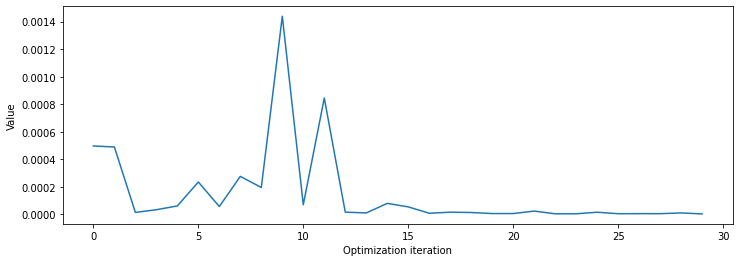

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(regrets)
plt.xlabel("Optimization iteration")
plt.ylabel("Value")

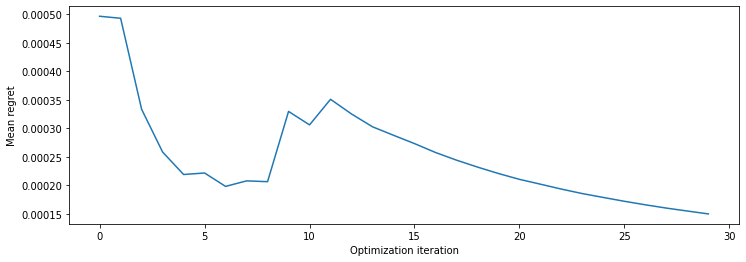

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(mean_regrets)
plt.xlabel("Optimization iteration")
plt.ylabel("Mean regret")
plt.show()

Text(0, 0.5, 'Value')

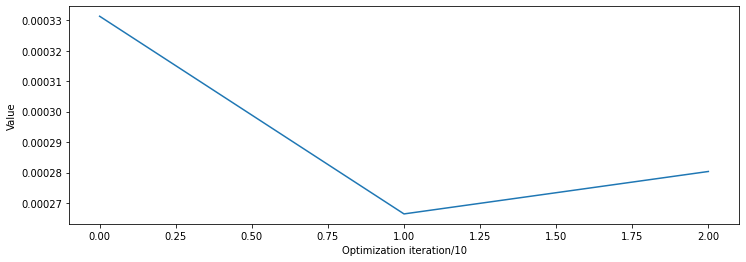

In [12]:
real_dists=transform_y.inverse_transform(model_info['typical_dist'])-transform_y.inverse_transform([0.0])
plt.figure(figsize=(12, 4))
plt.plot(real_dists)
plt.xlabel("Optimization iteration/10")
plt.ylabel("Value")


Text(0, 0.5, 'Value')

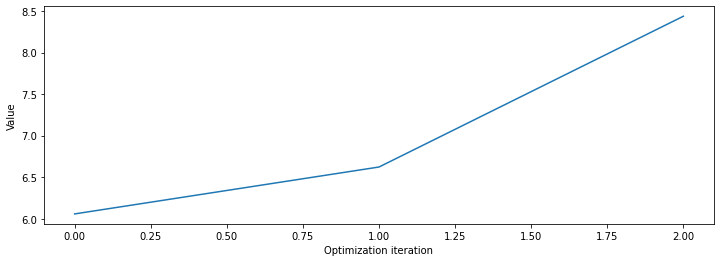

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(model_info['max_std'])
plt.xlabel("Optimization iteration")
plt.ylabel("Value")

In [15]:
dists=[np.linalg.norm(i) for i in (real_choices-max_point)]
print(min(dists))

0.15649648690214807


In [16]:
print(max(real_values))
print(max_value)

1.1369606
1.1369636


In [18]:
min_point, min_value=pso(func=lambda x: -evaluate_model(x), lb=lb, ub=ub, maxiter=50, debug=False)


Stopping search: maximum iterations reached --> 50


In [19]:
print(value)

tf.Tensor(-2.51367, shape=(), dtype=float32)


In [20]:
to_save={
    'point':min_point,
    'value':min_value
}

path=os.path.join('.','GPTraining','minimum.npyz')
with open(path,'wb') as file:
    np.savez(file,**to_save)